<font size="5">Importing Libaries</font>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Sequential

<font size="5">Load Datasets</font>

In [16]:
x_train = np.load('./datasets/x_train.npy')
y_train = np.load('./datasets/y_train.npy')
x_val = np.load('./datasets/x_val.npy')
y_val = np.load('./datasets/y_val.npy')
x_test = np.load('./datasets/x_test.npy')
y_test = np.load('./datasets/y_test.npy')

<font size="5">Creating Models</font>

In [17]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64,64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

<font size="5">Creating Learning Rate Function</font>

In [18]:
lr = 0.01
def learning_rate(epoch):
    global lr
    if epoch>8:
        return lr*.1
    else:
        return lr

<font size="5">Fitting Model</font>

In [19]:
results = model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
                                                                                        ,tf.keras.callbacks.LearningRateScheduler(learning_rate)])

Epoch 1/50
219/219 [==============================] - 4s 12ms/step - loss: 2.1355 - accuracy: 0.3019 - val_loss: 2.0726 - val_accuracy: 0.1993 - lr: 0.0100
Epoch 2/50
219/219 [==============================] - 2s 8ms/step - loss: 1.4541 - accuracy: 0.4535 - val_loss: 1.4235 - val_accuracy: 0.4651 - lr: 0.0100
Epoch 3/50
219/219 [==============================] - 2s 8ms/step - loss: 1.1554 - accuracy: 0.5923 - val_loss: 1.0607 - val_accuracy: 0.6231 - lr: 0.0100
Epoch 4/50
219/219 [==============================] - 2s 8ms/step - loss: 0.8595 - accuracy: 0.7092 - val_loss: 1.1038 - val_accuracy: 0.6609 - lr: 0.0100
Epoch 5/50
219/219 [==============================] - 2s 8ms/step - loss: 0.6804 - accuracy: 0.7696 - val_loss: 1.1969 - val_accuracy: 0.6621 - lr: 0.0100
Epoch 6/50
219/219 [==============================] - 2s 7ms/step - loss: 0.5617 - accuracy: 0.8189 - val_loss: 0.9531 - val_accuracy: 0.7274 - lr: 0.0100
Epoch 7/50
219/219 [==============================] - 2s 7ms/step - l

<font size="5">Testing Model</font>

In [20]:
test_result = model.test_on_batch(x_test,y_test)
test_result

[0.8503637313842773, 0.8455377817153931]

<font size="5">Plotting Metrices</font>

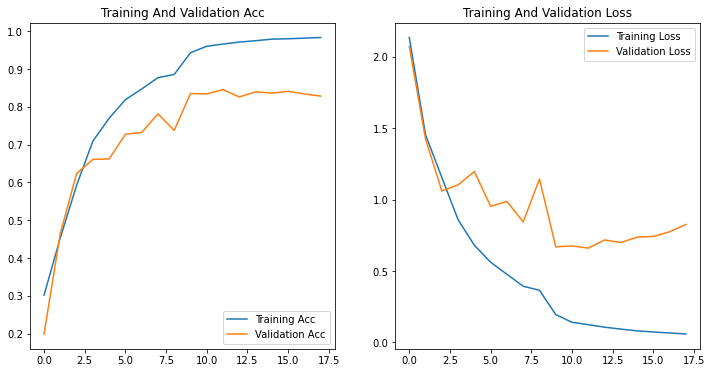

In [21]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

<font size="5">Hyperparameter Optimization</font>

In [22]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64,64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

<font size="5">Creating Learning Rate Function</font>

In [23]:
lr = 0.01
def learning_rate(epoch):
    global lr
    if epoch>8:
        return lr*.1
    else:
        return lr

<font size="5">Fitting Model</font>

In [24]:

results = model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
                                                                                        ,tf.keras.callbacks.LearningRateScheduler(learning_rate)])

Epoch 1/50
219/219 [==============================] - 4s 14ms/step - loss: 1.4711 - accuracy: 0.5304 - val_loss: 9.7119 - val_accuracy: 0.1145 - lr: 0.0100
Epoch 2/50
219/219 [==============================] - 3s 12ms/step - loss: 0.8646 - accuracy: 0.7124 - val_loss: 3.0569 - val_accuracy: 0.3643 - lr: 0.0100
Epoch 3/50
219/219 [==============================] - 3s 12ms/step - loss: 0.6764 - accuracy: 0.7722 - val_loss: 0.9873 - val_accuracy: 0.7056 - lr: 0.0100
Epoch 4/50
219/219 [==============================] - 3s 14ms/step - loss: 0.5685 - accuracy: 0.8123 - val_loss: 1.2856 - val_accuracy: 0.6770 - lr: 0.0100
Epoch 5/50
219/219 [==============================] - 3s 13ms/step - loss: 0.4650 - accuracy: 0.8498 - val_loss: 0.6319 - val_accuracy: 0.7835 - lr: 0.0100
Epoch 6/50
219/219 [==============================] - 2s 11ms/step - loss: 0.4057 - accuracy: 0.8700 - val_loss: 0.6678 - val_accuracy: 0.7973 - lr: 0.0100
Epoch 7/50
219/219 [==============================] - 2s 11ms/st

<font size="5">Testing Model</font>

In [25]:
test_result = model.test_on_batch(x_test,y_test)
test_result

[0.4989316463470459, 0.9073226451873779]

<font size="5">Plotting Metrices</font>

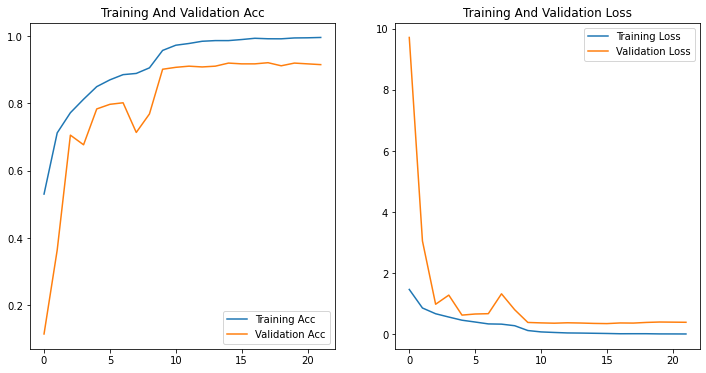

In [26]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()